# Autocorrelation

Much like correlation, autocorrelation gives a measure of the strength and direction of a relationship between two time series.  Autocorrelation is done with a variable and its lag. It's a correlation with itself, hence autocorrelation.  Basically, you are using the same time series and creating a second series, which is shifted by a time step. It is common to use the autocorrelation (ACF) plot to visualize the autocorrelation of a time-series.Let's start by taking a look at white noise.  

## White Noise

If your time series is statististically uncorrelated (independent) with zero mean and constant variance, then you have a particular type of noise called white noise. 

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plot
import numpy as np

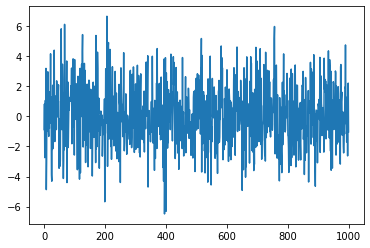

In [2]:
# Example of white noise
import numpy as np
# loc is mean, scale is standard deviation
white_noise = np.random.normal(loc=0, scale=2, size=1000)

# plot white noise
plot.plot(white_noise)

In [3]:
white_noise.mean()

0.09572644829842802

In [4]:
white_noise.std()

2.0191167048428156

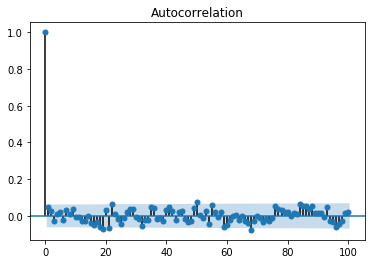

In [5]:
# Plot Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
# Example of white noise autocorrelation (serial correlation) 
plot_acf(white_noise, lags=100);

Be aware that all the lags have close to zero autocorrelation so this means that lagged values cannot be used in prediction.  All the lagged variables are random and are not useful for prediction.

### Example 1: Vacation Data

In [6]:
vacation = pd.read_csv("~/Desktop/section_2/df_vacation.csv", index_col='Month', parse_dates=True)
vacation.head()

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89


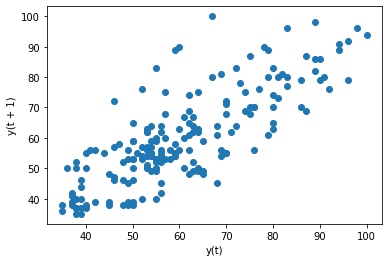

In [7]:
# Lag Plot
from pandas.plotting import lag_plot

lag_plot(vacation)
plot.show()

The plot above shows the vacation data on the y(t) against its previous time step, prior month, the the y(t+1). You can think of the data shifted by a month and then plotted, removing the first data point. Clearly, we see a positive relationship, though it is has a broader range of scatter.

In [8]:
# Autocorrelation
autocorrelation = vacation['Num_Search_Vacation'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

The autocorrelation is: 0.80


The correlation between the vacation data and its lag variable by a time step shows generally medium to high correlation at 0.80.  This indicates that there is a substantial, positive relationship.

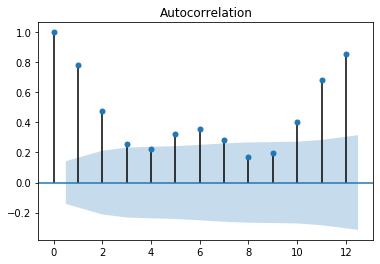

In [9]:
# Plot ACF to visualize the autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(vacation['Num_Search_Vacation'], lags=12);

The partial autocorrelation function (PACF) gives the partial correlation of a time series with its own lagged values. It controls for other lags. The idea for the PACF is that we perform correlation between a variable and itself lagged and then we subtract that effect from the variable and then find out what residual correlation is left over from that variable and further lags. For example, a PACF of order 3 returns the correlation between our time series (t1, t2, t3, ...) and its own values lagged by 3 time points (t4, t5, t6, ...), but only after removing all effects attributable to lags 1 and 2.

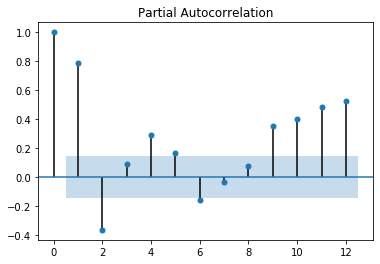

In [10]:
# Plot Partial autocorrelation function (PACF)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(vacation['Num_Search_Vacation'], lags=12);

If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

### Example 2: Furniture Data

In [11]:
furniture = pd.read_csv("~/Desktop/section_2/df_furniture.csv", index_col='Month', parse_dates=True)
furniture.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


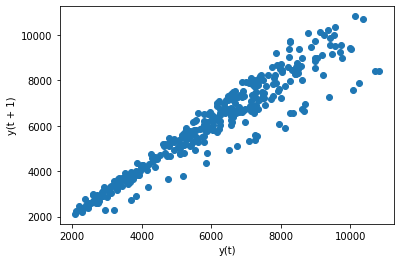

In [12]:
# Lag Plot
from pandas.plotting import lag_plot

lag_plot(furniture)
plot.show()

The plot above shows the furniture data against its previous time step, prior month. You can think of the data shifted by a month and then plotted, removing the first data point. Clearly, we see a positive relationship.

In [13]:
# Autocorrelation
autocorrelation = furniture['furniture_price_adjusted'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

The autocorrelation is: 0.95


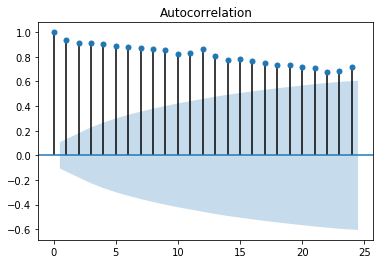

In [14]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(furniture['furniture_price_adjusted'], lags=24);

The x-axis shows the number of lags where the y-axis shows the correlation value. Note that correlation measure runs from -1 to 1.  The results show positive correlation. The scores all extend beyond the blue shaded region, which denotes statistical significance. For each time period, the measure is of its current time value's with its prior time value. It shows strong positive, autocorrelation up to 24 lags.

The partial autocorrelation function (PACF) gives the partial correlation of a time series with its own lagged values. It controls for other lags. The idea for the PACF is that we perform correlation between a variable and itself lagged and then we subtract that effect from the variable and then find out what residual correlation is left over from that variable and further lags. 

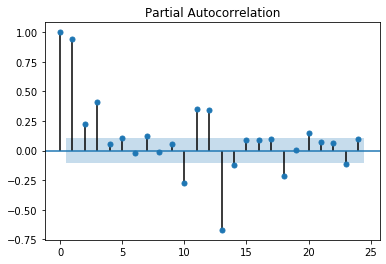

In [15]:
# Partial Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(furniture['furniture_price_adjusted'], lags=24);

Strong partial autocorrelation at the first two lags.  The candlesticks extend beyond the margin of uncertainty for lags 3 and 4 as well as 11 and 12, going in the positive direction.  In terms of negative correlation, lag 10, 13, and 18 show statistical significance in terms of negative correlation. 

### Example 3: Adjusted Close Stock price for Bank of America

In [16]:
df_bac = pd.read_csv("/Users/karenyang/Desktop/section_2/df_bankofamerica.csv", parse_dates=['Date'], index_col=0)
df_bac.head()

,Adj Close Price
Date,
1990-01-02,1.711862
1990-01-03,1.725632
1990-01-04,1.688917
1990-01-05,1.652200
1990-01-08,1.661379


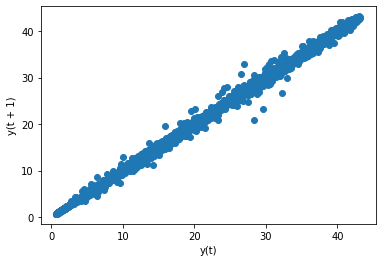

In [17]:
# Lag Plot
from pandas.plotting import lag_plot

lag_plot(df_bac)
plot.show()

In [18]:
# Autocorrelation
autocorrelation = df_bac['Adj Close Price'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

The autocorrelation is: 1.00


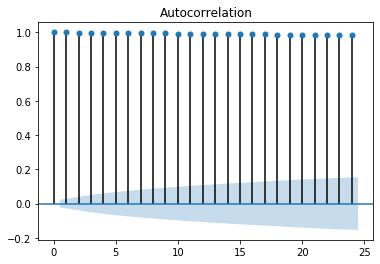

In [19]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_bac['Adj Close Price'], lags=24);

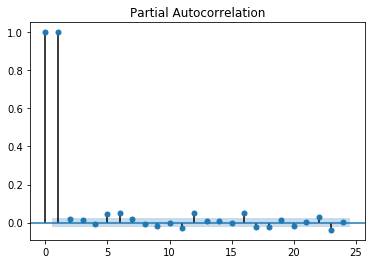

In [20]:
# Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_bac['Adj Close Price'], lags=24);

### Example 4: Adjusted Close Stock price for J.P. Morgan

In [21]:
df_jpm = pd.read_csv("/Users/karenyang/Desktop/section_2/df_jpmorgan.csv", parse_dates=['Date'], index_col=0)
df_jpm.head()

,Adj Close Price
Date,
1990-01-02,3.610043
1990-01-03,3.730377
1990-01-04,3.745418
1990-01-05,3.760463
1990-01-08,3.760463


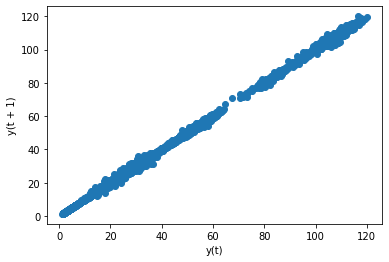

In [22]:
# Lag Plot
from pandas.plotting import lag_plot

lag_plot(df_jpm)
plot.show()

In [23]:
# Autocorrelation
autocorrelation = df_jpm['Adj Close Price'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

The autocorrelation is: 1.00


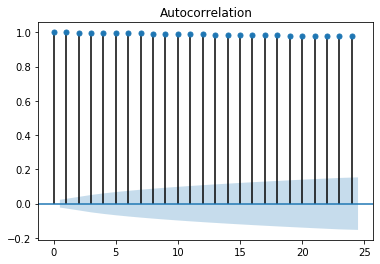

In [24]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_jpm['Adj Close Price'], lags=24);

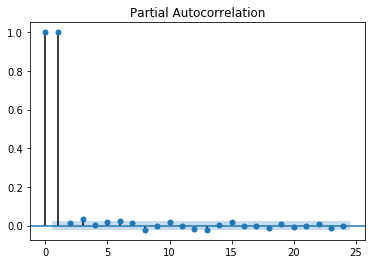

In [25]:
# Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_jpm['Adj Close Price'], lags=24);

### Example 5: Monthly Average Temperature of St. Louis

In [26]:
df_temp = pd.read_csv("/Users/karenyang/Desktop/section_2/df_temp.csv", parse_dates=['Date'], index_col=0)
df_temp.head()

,Value
Date,
1938-04-01,56.5
1938-05-01,64.7
1938-06-01,73.5
1938-07-01,80.4
1938-08-01,81.3


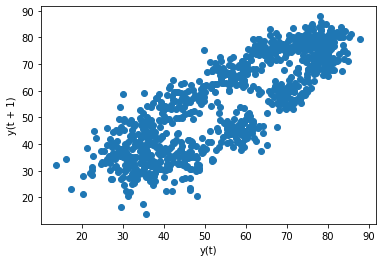

In [27]:
# Lag Plot
from pandas.plotting import lag_plot

lag_plot(df_temp)
plot.show()

In [28]:
# Autocorrelation
autocorrelation = df_temp['Value'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

The autocorrelation is: 0.83


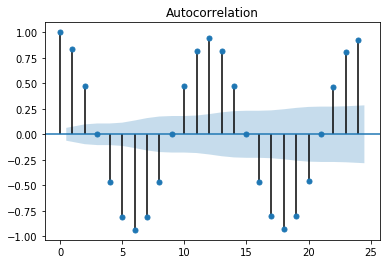

In [29]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_temp['Value'], lags=24);

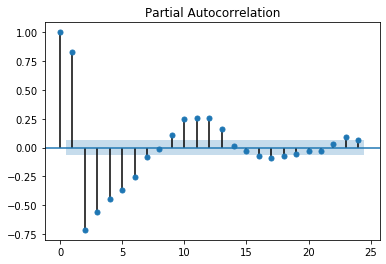

In [30]:
# Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_temp['Value'], lags=24);

In [ ]:
# end